
# Customer Analytics
This notebook presents a step-by-step solution to the Lidl Analytics case study. Our goal is to analyze customer purchasing behavior using transactional data and segment customers to provide personalized coupon strategies.

**Objectives**:
1. Analyze transactional data to derive meaningful customer insights.
2. Segment customers based on their purchasing patterns.
3. Provide actionable business recommendations for personalized marketing.

**Approach**:
- Data preprocessing and feature engineering to create RFM metrics.
- Exploratory data analysis (EDA) to identify trends and patterns.
- Customer segmentation using clustering techniques.
- Visualization of results and presentation of business insights.


### Data Loading and Preprocessing
The first step involves loading the transactional dataset and performing essential preprocessing tasks. This includes:
- Removing missing or invalid data to ensure accuracy.
- Parsing date fields to enable time-based analysis.

These steps ensure the dataset is ready for exploratory analysis and segmentation.


In [0]:
# File location and type
file_location = "/FileStore/tables/data.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df1)

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 12/1/2010 8:26 2.55 17850 United Kingdom 536365 71053 WHITE METAL LANTERN 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 12/1/2010 8:26 2.75 17850 United Kingdom 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 12/1/2010 8:26 7.65 17850 United Kingdom 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 12/1/2010 8:26 4.25 17850 United Kingdom 536366 22633 HAND WARMER UNION JACK 6 12/1/2010 8:28 1.85 17850 United Kingdom 536366 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 8:28 1.85 17850 United Kingdom 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 12/1/2010 8:34 1.69 13047 United Kingdom 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 12/1/2010 8:34 3.75 13047 United Kingdom 536367 22310 IVORY KNITTED MUG COSY 6 12/1/2010 8:34 1.65 13047 United Kingdom 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 12/1/2010 8:34 4.95 13047 United Kingdom 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 12/1/2010 8:34 9.95 13047 United Kingdom 536367 21754 HOME BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21755 LOVE BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21777 RECIPE BOX WITH METAL HEART 4 12/1/2010 8:34 7.95 13047 United Kingdom 536367 48187 DOORMAT NEW ENGLAND 4 12/1/2010 8:34 7.95 13047 United Kingdom 536368 22960 JAM MAKING SET WITH JARS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536368 22913 RED COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22912 YELLOW COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22914 BLUE COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536369 21756 BATH BUILDING BLOCK WORD 3 12/1/2010 8:35 5.95 13047 United Kingdom 536370 22728 ALARM CLOCK BAKELIKE PINK 24 12/1/2010 8:45 3.75 12583 France 536370 22727 ALARM CLOCK BAKELIKE RED 24 12/1/2010 8:45 3.75 12583 France 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 12/1/2010 8:45 3.75 12583 France 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 12/1/2010 8:45 0.85 12583 France 536370 21883 STARS GIFT TAPE 24 12/1/2010 8:45 0.65 12583 France 536370 10002 INFLATABLE POLITICAL GLOBE 48 12/1/2010 8:45 0.85 12583 France 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 12/1/2010 8:45 1.25 12583 France 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 12/1/2010 8:45 2.95 12583 France 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 12/1/2010 8:45 2.95 12583 France 536370 22629 SPACEBOY LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22659 LUNCH BOX I LOVE LONDON 24 12/1/2010 8:45 1.95 12583 France 536370 22631 CIRCUS PARADE LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 12/1/2010 8:45 0.85 12583 France 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 12/1/2010 8:45 1.65 12583 France 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 12/1/2010 8:45 2.95 12583 France 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 12/1/2010 8:45 3.75 12583 France 536370 22540 MINI JIGSAW CIRCUS PARADE 24 12/1/2010 8:45 0.42 12583 France 536370 22544 MINI JIGSAW SPACEBOY 24 12/1/2010 8:45 0.42 12583 France 536370 22492 MINI PAINT SET VINTAGE 36 12/1/2010 8:45 0.65 12583 France 536370 POST POSTAGE 3 12/1/2010 8:45 18 12583 France 536371 22086 PAPER CHAIN KIT 50'S CHRISTMAS 80 12/1/2010 9:00 2.55 13748 United Kingdom 536372 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 9:01 1.85 17850 United Kingdom 536372 22633 HAND WARMER UNION JACK 6 12/1/2010 9:01 1.8

In [0]:
# Convert Spark DataFrame to Pandas DataFrame
df = df1.toPandas()
print("\nSummary statistics of the dataset:")
df.info()


Summary statistics of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   406829 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [0]:
import pandas as pd

# Convert Quantity and UnitPrice to numeric types
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
# Check if there are any negative values in the 'Quantity' column
negative_quantity = df[df['Quantity'] < 0]

# Display rows with negative 'Quantity'
print(negative_quantity)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50      1

In [0]:
# Check if there are any negative values in the 'UnitPrice' column
negative_UnitPrice = df[df['UnitPrice'] < 0]

# Display rows with negative 'UnitPrice'
print(negative_UnitPrice)

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  
299983  -11062.06       None  United Kingdom  
299984  -11062.06       None  United Kingdom  


In [0]:
# Removing the negative quantities from data
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

# Converting the 'InvoiceDate' to date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculating the TotalCost for each product sold
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Remove rows where 'CustomerID' is null
df = df.dropna(subset=['CustomerID'])

# Check the shape
df.shape

Out[8]: (397884, 9)

In [0]:
df.info()
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   TotalCost    397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64


### Summary of Preprocessing
The dataset has been successfully loaded and cleaned:
- Missing values were handled by removing records with null values.
- Date fields were converted to a standard datetime format.
- Records with invalid or outlier values were filtered out.

The cleaned dataset is now ready for exploratory analysis.


In [0]:
# Check the number of rows in the table
row_count = df.count()
print(f"Total rows in table: {row_count}")

# Displaying a large number of rows
print(df.head(50000)) 

Total rows in table: InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
TotalCost      397884
dtype: int64
      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
81139    543111     22791         T-LIGHT GLASS FLUTED ANTIQUE         6   
81140    543111     21326     AGED GLASS SILVER T-LIGHT HOLDER         3   
81141    543111     22667                RECIPE BOX RETROSPOT          1   
81142   

## SQL Integration and Querying
To simplify data manipulation and analysis, we create a temporary table in Spark SQL:
- This allows us to query the dataset using SQL commands.
- SQL is particularly useful for filtering, aggregating, and joining data.

In this section:
1. Create a temporary table for the dataset.
2. Query the table to inspect its structure and derive initial insights.


In [0]:
# Create a view or table

temp_table_name = "data_csv"

df_spark = spark.createDataFrame(df)

df_spark.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `data_csv`

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country TotalCost 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 2010-12-01T08:26:00.000+0000 2.55 17850 United Kingdom 15.299999999999999 536365 71053 WHITE METAL LANTERN 6 2010-12-01T08:26:00.000+0000 3.39 17850 United Kingdom 20.34 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 2010-12-01T08:26:00.000+0000 2.75 17850 United Kingdom 22.0 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 2010-12-01T08:26:00.000+0000 3.39 17850 United Kingdom 20.34 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 2010-12-01T08:26:00.000+0000 3.39 17850 United Kingdom 20.34 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 2010-12-01T08:26:00.000+0000 7.65 17850 United Kingdom 15.3 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 2010-12-01T08:26:00.000+0000 4.25 17850 United Kingdom 25.5 536366 22633 HAND WARMER UNION JACK 6 2010-12-01T08:28:00.000+0000 1.85 17850 United Kingdom 11.100000000000001 536366 22632 HAND WARMER RED POLKA DOT 6 2010-12-01T08:28:00.000+0000 1.85 17850 United Kingdom 11.100000000000001 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 2010-12-01T08:34:00.000+0000 1.69 13047 United Kingdom 54.08 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 2010-12-01T08:34:00.000+0000 2.1 13047 United Kingdom 12.600000000000001 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 2010-12-01T08:34:00.000+0000 2.1 13047 United Kingdom 12.600000000000001 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 2010-12-01T08:34:00.000+0000 3.75 13047 United Kingdom 30.0 536367 22310 IVORY KNITTED MUG COSY 6 2010-12-01T08:34:00.000+0000 1.65 13047 United Kingdom 9.899999999999999 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 2010-12-01T08:34:00.000+0000 4.25 13047 United Kingdom 25.5 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 2010-12-01T08:34:00.000+0000 4.95 13047 United Kingdom 14.850000000000001 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 2010-12-01T08:34:00.000+0000 9.95 13047 United Kingdom 19.9 536367 21754 HOME BUILDING BLOCK WORD 3 2010-12-01T08:34:00.000+0000 5.95 13047 United Kingdom 17.85 536367 21755 LOVE BUILDING BLOCK WORD 3 2010-12-01T08:34:00.000+0000 5.95 13047 United Kingdom 17.85 536367 21777 RECIPE BOX WITH METAL HEART 4 2010-12-01T08:34:00.000+0000 7.95 13047 United Kingdom 31.8 536367 48187 DOORMAT NEW ENGLAND 4 2010-12-01T08:34:00.000+0000 7.95 13047 United Kingdom 31.8 536368 22960 JAM MAKING SET WITH JARS 6 2010-12-01T08:34:00.000+0000 4.25 13047 United Kingdom 25.5 536368 22913 RED COAT RACK PARIS FASHION 3 2010-12-01T08:34:00.000+0000 4.95 13047 United Kingdom 14.850000000000001 536368 22912 YELLOW COAT RACK PARIS FASHION 3 2010-12-01T08:34:00.000+0000 4.95 13047 United Kingdom 14.850000000000001 536368 22914 BLUE COAT RACK PARIS FASHION 3 2010-12-01T08:34:00.000+0000 4.95 13047 United Kingdom 14.850000000000001 536369 21756 BATH BUILDING BLOCK WORD 3 2010-12-01T08:35:00.000+0000 5.95 13047 United Kingdom 17.85 536370 22728 ALARM CLOCK BAKELIKE PINK 24 2010-12-01T08:45:00.000+0000 3.75 12583 France 90.0 536370 22727 ALARM CLOCK BAKELIKE RED 24 2010-12-01T08:45:00.000+0000 3.75 12583 France 90.0 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 2010-12-01T08:45:00.000+0000 3.75 12583 France 45.0 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 2010-12-01T08:45:00.000+0000 0.85 12583 France 10.2 536370 21883 STARS GIFT TAPE 24 2010-12-01T08:45:00.000+0000 0.65 12583 France 15.600000000000001 536370 10002 INFLATABLE POLITICAL GLOBE 48 2010-12-01T08:45:00.000+0000 0.85 12583 France 40.8 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 2010-12-01T08:45:00.000+0000 1.25 12583 France 30.0 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 2010-12-01T08:45:00.000+0000 2.95 12583 France 53.1 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 2010-12-01T08:45:00.000+0000 2.95 12583 France 70.80000000000001 536370 22629 SPACEBOY LUNCH BOX 24 2010-12-01T08:45:00.000+0000 1.95 12583 France 46.8 536370 22659 LUNCH BOX I LOVE LONDON 24 2010-12-01T08:45:00.000+0000 1.95 12583 France 46.8 536

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "data_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
%sql
-- Total number of unique customers
SELECT COUNT(DISTINCT CustomerID) AS total_customers 
FROM `data_csv`
WHERE Quantity>0
;

total_customers 4338

In [0]:
%sql
SELECT 'Total' AS Country,  ROUND(SUM(Quantity * UnitPrice), 2) AS TotalSales
FROM `data_csv`;

Country TotalSales Total 8911407.9

In [0]:
%sql
-- Total Sales by Country
SELECT Country,  ROUND(SUM(Quantity * UnitPrice), 2) AS TotalSalesByCountry
FROM  `data_csv`
GROUP BY Country
ORDER BY TotalSalesByCountry DESC;
    

Country TotalSalesByCountry United Kingdom 7308391.55 Netherlands 285446.34 EIRE 265545.9 Germany 228867.14 France 209024.05 Australia 138521.31 Spain 61577.11 Switzerland 56443.95 Belgium 41196.34 Sweden 38378.33 Japan 37416.37 Norway 36165.44 Portugal 33439.89 Finland 22546.08 Singapore 21279.29 Channel Islands 20450.44 Denmark 18955.34 Italy 17483.24 Cyprus 13590.38 Austria 10198.68 Poland 7334.65 Israel 7221.69 Greece 4760.52 Iceland 4310.0 Canada 3666.38 USA 3580.39 Malta 2725.59 Unspecified 2667.07 United Arab Emirates 1902.28 Lebanon 1693.88 Lithuania 1661.06 European Community 1300.25 Brazil 1143.6 RSA 1002.31 Czech Republic 826.74 Bahrain 548.4 Saudi Arabia 145.92

In [0]:
%sql
-- Top 10 most sold products in the United Kingdom
SELECT StockCode, COUNT(Quantity) AS total_sold
FROM `data_csv`
WHERE Quantity>0 AND Country ='United Kingdom'
GROUP BY StockCode
ORDER BY total_sold DESC
LIMIT 10;

StockCode total_sold 85123A 1947 85099B 1464 22423 1426 84879 1333 47566 1307 20725 1147 20727 1049 22720 1020 23203 999 22383 996

In [0]:
%sql
--Distinct purchases for each customer
SELECT CustomerID,  COUNT(DISTINCT InvoiceDate) AS num_purchases
FROM `data_csv`
WHERE Quantity>0 AND CustomerID IS NOT NULL AND Country ='United Kingdom'
GROUP BY CustomerID 
ORDER BY num_purchases DESC;

CustomerID num_purchases 12748 210 17841 124 14606 95 13089 93 15311 91 12971 83 16029 61 13408 58 13798 57 14527 55 18102 55 16422 50 13694 50 15039 47 17450 46 15061 46 17949 45 14298 44 16013 44 15189 41 17961 39 17811 39 17315 38 13468 37 13199 36 12921 36 13767 36 13263 35 17389 34 16839 34 16133 33 17850 33 13777 32 17511 32 17675 31 17757 30 15159 30 15078 30 14735 30 17677 30 15005 29 17381 29 13098 28 12901 28 16684 27 15498 27 17428 27 15856 27 13018 26 16168 26 13078 26 16525 26 18109 26 17243 26 18118 26 14667 25 14180 25 13854 25 13319 25 15769 25 13113 24 12841 24 13069 24 17581 24 13102 24 15615 23 17857 23 14056 23 14051 23 16779 22 14849 22 14560 22 16353 22 13534 22 16931 21 16729 21 16523 21 17068 21 16333 21 13668 21 16814 21 18041 21 15358 21 14688 21 16705 20 14895 20 17377 20 16558 20 13881 20 17017 20 16672 20 16033 20 18229 20 17865 20 14194 20 16161 19 13599 19 15513 19 17735 19 16923 19 17576 19 14060 19 14397 19 14031 19 15838 19 16458 18 14085 18 13004 18 13576 18 15465 18 14534 18 13969 18 16945 18 14562 18 17306 18 16746 18 13418 18 13267 18 15290 18 16210 18 16626 17 14217 17 17238 17 18241 17 14796 17 17920 17 15805 17 14057 17 15044 17 13050 17 16745 17 18198 17 14096 17 15144 17 14702 17 18172 17 16928 17 15555 16 18283 16 15738 16 14680 16 14367 16 14543 16 16904 16 16843 16 16011 16 13230 16 15187 16 16592 16 15271 15 13985 15 14135 15 15125 15 17706 15 17611 15 15291 15 12989 15 15640 15 14189 15 17690 15 17719 15 17346 15 16656 15 13269 15 14282 15 16713 15 15939 15 16187 15 12931 15 15867 15 13695 15 15046 15 15194 15 18223 14 17790 14 17220 14 17613 14 15601 14 13090 14 17965 14 14607 14 13458 14 15694 14 16326 14 16607 14 13756 14 14092 14 15547 14 12839 14 15249 13 14401 13 15827 13 17730 13 15611 13 17402 13 15581 13 13001 13 15955 13 13013 13 16764 13 16722 13 16782 13 13709 13 16191 13 14415 13 15152 13 14709 13 16701 13 16241 13 17975 13 16700 13 15719 13 14088 13 15804 13 16393 13 13488 13 14191 13 13880 13 13571 12 16401 12 13999 12 17652 12 13148 12 13552 12 13094 12 16186 12 18144 12 16678 12 17870 12 17809 12 14866 12 15482 12 14733 12 16553 12 17139 12 14040 12 13871 12 14110 12 12877 12 14062 12 15570 12 15971 12 14800 12 14825 12 15301 12 18073 12 17954 12 17858 12 13742 12 15373 12 17659 12 17419 12 18225 12 15298 12 13266 12 13983 12 14810 11 14776 11 15235 11 12955 11 13178 11 14159 11 12747 11 17364 11 18077 11 18065 11 16837 11 16145 11 16767 11 15854 11 18226 11 16670 11 13629 11 14462 11 17799 11 14132 11 17644 11 13631 11 17530 11 14502 11 14711 11 14755 11 15251 11 15058 11 13081 11 16919 11 14239 11 17001 11 14713 11 16775 11 14099 11 13268 11 15502 11 18092 11 15023 11 13784 11 14944 11 17061 11 15218 11 14032 11 15529 11 17725 11 16818 11 17716 11 14952 11 16549 10 13700 10 17491 10 15114 10 17769 10 13769 10 13491 10 14291 10 16710 10 18055 10 18061 10 14243 10 16712 10 15024 10 18219 10 16638 10 14426 10 15514 10 13184 10 16985 10 16813 10 17512 10 16076 10 13324 10 18044 10 16426 10 15356 10 15129 10 18075 10 15984 10 16570 10 15150 10 17218 10 13014 10 17231 10 17651 10 13305 10 16794 10 13890 10 13426 10 13097 10 17940 10 15033 10 14525 9 14701 9 14659 9 15544 9 17071 9 17750 9 18008 9 14309 9 13021 9 15602 9 14395 9 16942 9 13755 9 16365 9 17162 9 17758 9 16954 9 14961 9 16407 9 14704 9 17069 9 17800 9 14573 9 16912 9 16359 9 17504 9 16156 9 17293 9 15410 9 14390 9 16019 9 13842 9 14221 9 14769 9 15021 9 14292 9 17049 9 13183 9 13993 9 14524 9 15861 9 15059 9 14901 9 14456 9 12980 9 14258 9 16265 9 17848 9 14878 9 17705 9 14083 9 15687 9 13588 9 15622 9 14211 9 14299 9 14587 9 17634 9 14410 9 13047 9 13911 9 17340 9 15281 9 15628 9 15606 9 13704 9 15660 9 13082 9 16817 9 12957 8 14227 8 17211 8 15845 8 16255 8 14868 8 13126 8 16098 8 12949 8 14653 8 17314 8 15214 8 13327 8 15910 8 17228 8 15134 8 17696 8 14808 8 16316 8 15527 8 15241 8 17365 8 13870 8 17368 8 17338 8 16180 8 17528 8 15953 8 18257 8 15916 8 12910 8 15632 8 14547 8 13012 8 14030 8 17114 8 1

### Query Results
The initial SQL queries show:
- The dataset contains detailed transactional records.
- Key attributes, such as **CustomerID** and **InvoiceNo**, are essential for segmentation.
- Further SQL queries will help aggregate data for feature creation.



## Feature Engineering: RFM Metrics
To effectively segment customers, we calculate Recency, Frequency, and Monetary (RFM) metrics:
- **Recency**: Number of days since the customer's last purchase.
- **Frequency**: Total number of transactions per customer.
- **Monetary**: Total revenue generated by each customer.

These features provide a quantitative basis for customer segmentation.


In [0]:
# Calculating Recency, Frequency, and Monetary

current_date = df['InvoiceDate'].max()
current_date

recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (current_date - recency).dt.days

# Frequency
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()

# Monetary
monetary = df.groupby('CustomerID')['TotalCost'].sum()

In [0]:
# Combining the Recency, Frequency, and Monetary into a single dataframe

RFMdf = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [0]:
# Merging the values of 'InvoiceDate' and 'CustomerID' in the rfm_df
rfm = pd.merge(RFMdf, df[['CustomerID','InvoiceDate']],on = 'CustomerID', how = 'inner')

rfm.head(10)

CustomerID 
 Recency 
 Frequency 
 Monetary 
 InvoiceDate 
 
 
 
 
 0 
 12346 
 325 
 1 
 77183.6 
 2011-01-18 10:01:00 
 
 
 1 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 2 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 3 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 4 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 5 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 6 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 7 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 8 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00 
 
 
 9 
 12347 
 1 
 7 
 4310.0 
 2010-12-07 14:57:00

### Visualizations to understand the correlation between the RFM variables
- **Heatmap:**
A heatmap illustrates the pairwise correlations between Recency, Frequency, and Monetary (RFM) variables. This helps identify linear relationships and the strength of associations among the variables.

- **Histograms:**
Individual histograms for each RFM variable highlight their distributions. This provides insights into how values are spread, including skewness or any unusual patterns.

- **Scatter Plots:**
Scatter plots between each pair of RFM variables help visualize their relationships. Patterns in these plots can reveal potential trends or clusters, offering a better understanding of interdependencies.

            Recency  Frequency  Monetary
Recency    1.000000  -0.260616 -0.122097
Frequency -0.260616   1.000000  0.549568
Monetary  -0.122097   0.549568  1.000000


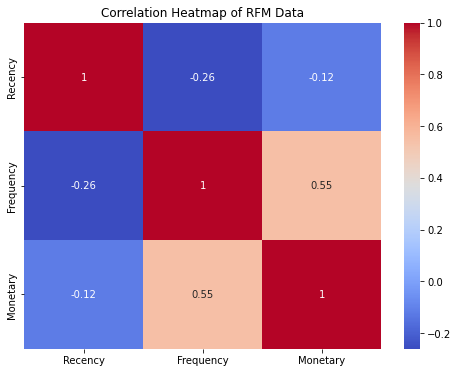

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ploting a Heatmap, to visualise the correlation between the RFM variables
rfm_corr = RFMdf[['Recency', 'Frequency','Monetary']].corr()

print(rfm_corr)
# Creating the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(rfm_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of RFM Data')
plt.show()

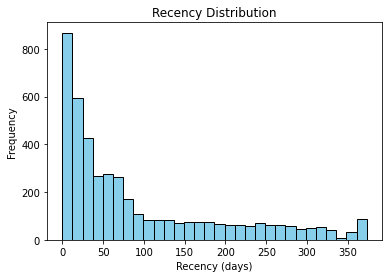

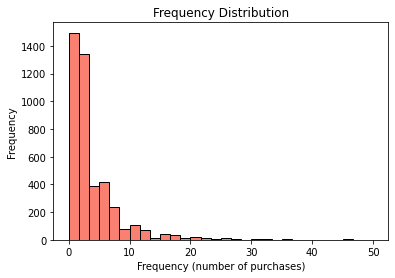

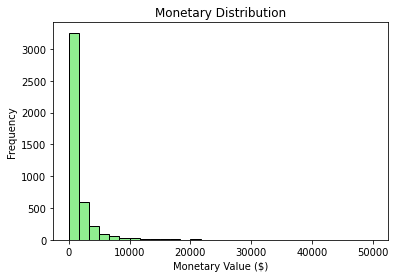

In [0]:
# Visualising the RFM data
# Plotting a histogram for Recency
plt.hist(RFMdf['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Frequency
plt.hist(RFMdf['Frequency'], bins=30, color='salmon', edgecolor='black', range=(0, 50))
plt.title('Frequency Distribution')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Monetary
plt.hist(RFMdf['Monetary'], bins=30, color='lightgreen', edgecolor='black', range=(0, 50000))
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.show()

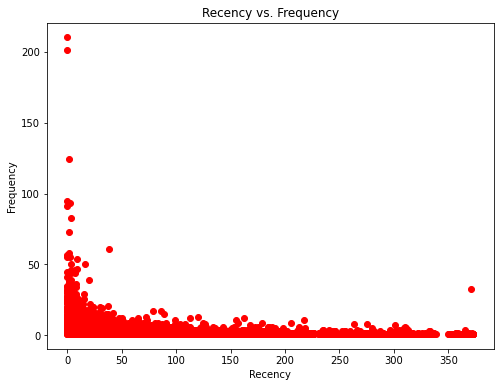

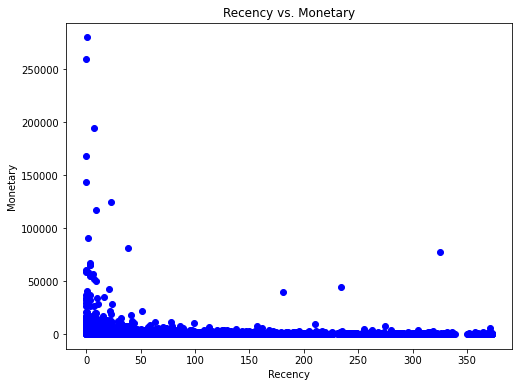

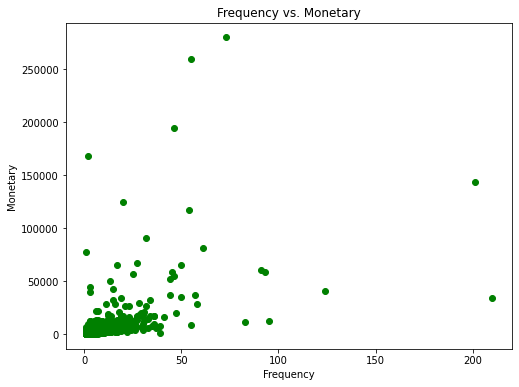

In [0]:
# Scatter plot
# Recency vs Frequency
plt.figure(figsize = (8,6))
plt.scatter(RFMdf['Recency'], RFMdf['Frequency'], color = 'red')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Recency VS Monetary
plt.figure(figsize = (8,6))
plt.scatter(RFMdf['Recency'], RFMdf['Monetary'], color = 'blue')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

# Frequency VS Monetary
plt.figure(figsize = (8,6))
plt.scatter(RFMdf['Frequency'], RFMdf['Monetary'], color = 'green')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

###Calculating Customer Scores: Preparation
To quantify customer behavior based on Recency, Frequency, and Monetary values, we segment these metrics into scores using quintiles (5 equal-sized groups). Each metric is assigned a score from 1 (lowest) to 5 (highest), reflecting customer engagement levels:

- **RecencyScore:** Lower values for more recent purchases.
- **FrequencyScore:** Higher values for frequent purchases.
- **MonetaryScore:** Higher values for greater spending.

These scores are combined into an RFMScore, a composite indicator to classify and prioritize customers for further analysis.


In [0]:
# Calculating the Customer Scores

RFMdf['RecencyScore'] = pd.qcut(RFMdf['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFMdf['FrequencyScore'] = pd.qcut(RFMdf['Frequency'], 5, labels=[1, 2, 3, 4],duplicates='drop')  
RFMdf['MonetaryScore'] = pd.qcut(RFMdf['Monetary'], 5, labels=[1, 2, 3, 4, 5])  
# Combining the scores into one RFM score
# Define weights for RFM metrics
RECENCY_WEIGHT = 0.3
FREQUENCY_WEIGHT = 0.4
MONETARY_WEIGHT = 0.3

# Calculate weighted RFM Score
RFMdf['RFMScore'] = (
    (RFMdf['RecencyScore'].astype(int) * RECENCY_WEIGHT) +
    (RFMdf['FrequencyScore'].astype(int) * FREQUENCY_WEIGHT) +
    (RFMdf['MonetaryScore'].astype(int) * MONETARY_WEIGHT)
)

In [0]:
RFMdf.describe()


Recency 
 Frequency 
 Monetary 
 RFMScore 
 
 
 
 
 count 
 4338.000000 
 4338.000000 
 4338.000000 
 4338.000000 
 
 
 mean 
 91.536422 
 4.250807 
 2054.266460 
 2.592739 
 
 
 std 
 100.014169 
 7.635202 
 8989.230441 
 1.117724 
 
 
 min 
 0.000000 
 1.000000 
 3.750000 
 1.000000 
 
 
 25% 
 17.000000 
 1.000000 
 307.415000 
 1.600000 
 
 
 50% 
 50.000000 
 2.000000 
 674.485000 
 2.400000 
 
 
 75% 
 141.000000 
 5.000000 
 1661.740000 
 3.600000 
 
 
 max 
 373.000000 
 210.000000 
 280206.020000 
 4.600000

In [0]:
print(RFMdf['RFMScore'].dtype)

float64


In [0]:
#Converting the RFMScore Column to int

RFMdf['RFMScore'] = pd.to_numeric(RFMdf['RFMScore'])
RFMdf.head(10)

Recency 
 Frequency 
 Monetary 
 RecencyScore 
 FrequencyScore 
 MonetaryScore 
 RFMScore 
 
 
 CustomerID 
 
 
 
 
 
 
 
 
 
 
 
 12346 
 325 
 1 
 77183.60 
 1 
 1 
 5 
 2.2 
 
 
 12347 
 1 
 7 
 4310.00 
 5 
 4 
 5 
 4.6 
 
 
 12348 
 74 
 4 
 1797.24 
 2 
 3 
 4 
 3.0 
 
 
 12349 
 18 
 1 
 1757.55 
 4 
 1 
 4 
 2.8 
 
 
 12350 
 309 
 1 
 334.40 
 1 
 1 
 2 
 1.3 
 
 
 12352 
 35 
 8 
 2506.04 
 3 
 4 
 5 
 4.0 
 
 
 12353 
 203 
 1 
 89.00 
 1 
 1 
 1 
 1.0 
 
 
 12354 
 231 
 1 
 1079.40 
 1 
 1 
 4 
 1.9 
 
 
 12355 
 213 
 1 
 459.40 
 1 
 1 
 2 
 1.3 
 
 
 12356 
 22 
 3 
 2811.43 
 4 
 2 
 5 
 3.5

### Segmenting Customers Based on RFM Scores

To derive actionable insights from the RFM analysis, customers are segmented into groups based on their overall **RFMScore**. Each segment represents a distinct category of customer behavior, enabling tailored marketing strategies:

- **High-Value Customers**: High scores across all metrics; the most valuable customers.  
- **Loyal Customers**: Consistently engaged and moderately high scores.  
- **Potential Loyalists**: Emerging as valuable customers.  
- **At Risk**: Decreasing engagement and recency.  
- **Lost Customers**: Low scores, signaling disengaged customers.  

This classification helps prioritize efforts to nurture, retain, or re-engage customers effectively.


In [0]:
# Segementing Customers

# Define a segmentation function based on the Weighted RFM Score
def segment_customer_based_on_weighted_rfm(row):
    if row['RFMScore'] >= 4.0:
        return 'High-Value Customers'
    elif 3.5 <= row['RFMScore'] < 4.0:
        return 'Loyal Customers'
    elif 3.0 <= row['RFMScore'] < 3.5:
        return 'Potential Loyalists'
    elif 2.0 <= row['RFMScore'] < 3.0:
        return 'At Risk'
    else:
        return 'Lost Customers'

RFMdf['Segment'] = RFMdf.apply(segment_customer_based_on_weighted_rfm, axis=1)

RFMdf.head()

Recency 
 Frequency 
 Monetary 
 RecencyScore 
 FrequencyScore 
 MonetaryScore 
 RFMScore 
 Segment 
 
 
 CustomerID 
 
 
 
 
 
 
 
 
 
 
 
 
 12346 
 325 
 1 
 77183.60 
 1 
 1 
 5 
 2.2 
 At Risk 
 
 
 12347 
 1 
 7 
 4310.00 
 5 
 4 
 5 
 4.6 
 High-Value Customers 
 
 
 12348 
 74 
 4 
 1797.24 
 2 
 3 
 4 
 3.0 
 Potential Loyalists 
 
 
 12349 
 18 
 1 
 1757.55 
 4 
 1 
 4 
 2.8 
 At Risk 
 
 
 12350 
 309 
 1 
 334.40 
 1 
 1 
 2 
 1.3 
 Lost Customers

### Visualizing Customer Segments

To understand the customer segments, we use visualizations that provide insights into their behaviors:

1. **Scatter Plot of Frequency vs. Monetary**: This plot visualizes how the frequency of purchases correlates with the monetary value for each customer, with segments indicated by different colors. It helps identify patterns across segments, such as Super Loyal or At Risk customers.

2. **Box Plot of Recency by Segment**: This plot shows the distribution of recency values (days since last purchase) for each customer segment. It provides insights into how recently each segment has interacted with the business, with higher recency suggesting less frequent engagement.


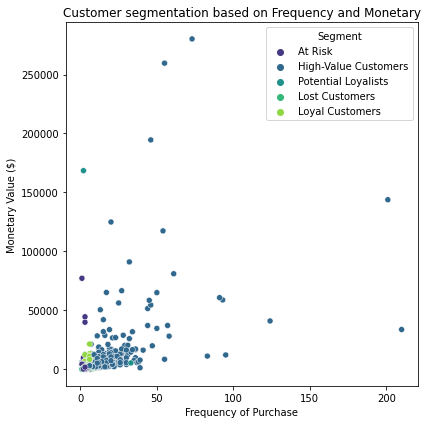

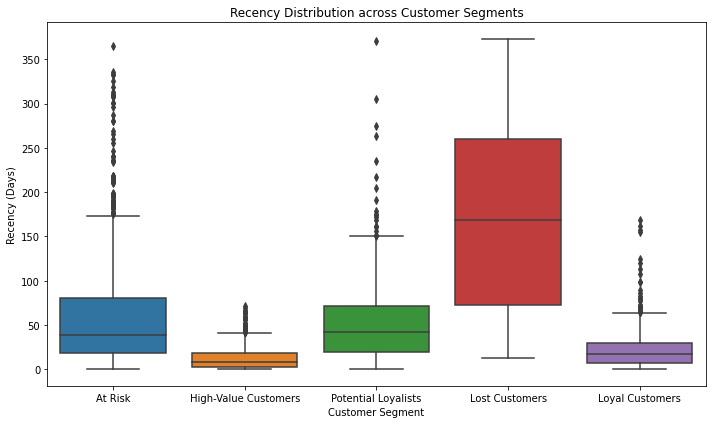

In [0]:
# Visualising the segments

plt.figure(figsize=(6,6))

# Scatter plot of Frequecy vs. Monetary, colored by segment
sns.scatterplot(x = 'Frequency', y='Monetary', hue = 'Segment', data = RFMdf, palette='viridis')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Monetary Value ($)')
plt.tight_layout()
plt.show()

# Plot distribution of Recency scores across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Recency', data=RFMdf)
plt.title('Recency Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.tight_layout()
plt.show()

### Pie Chart of Customer Segments

To visualize the distribution of customer segments, we plot a pie chart showing the percentage of customers in each segment. This provides a clear overview of the proportion of customers categorized as High Value, Loyal, Potential Loyalists, At Risk, and Lost Customers. The chart allows us to quickly identify which segments dominate and offers insights into how customers are spread across different levels of loyalty and engagement with the business.


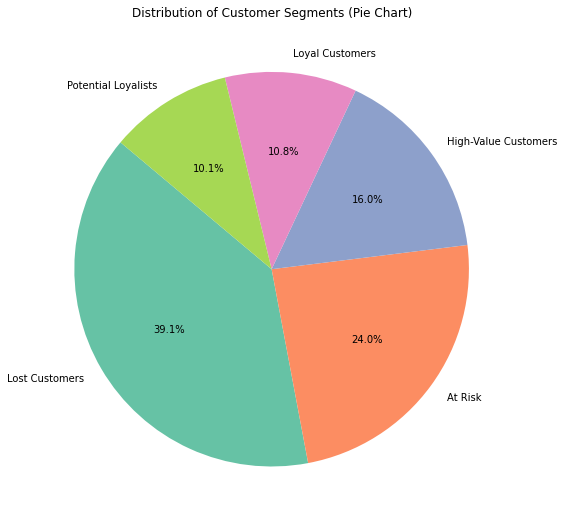

In [0]:
# Pie Chart of cutomer segments
segment_counts = RFMdf['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.tight_layout()
plt.show()

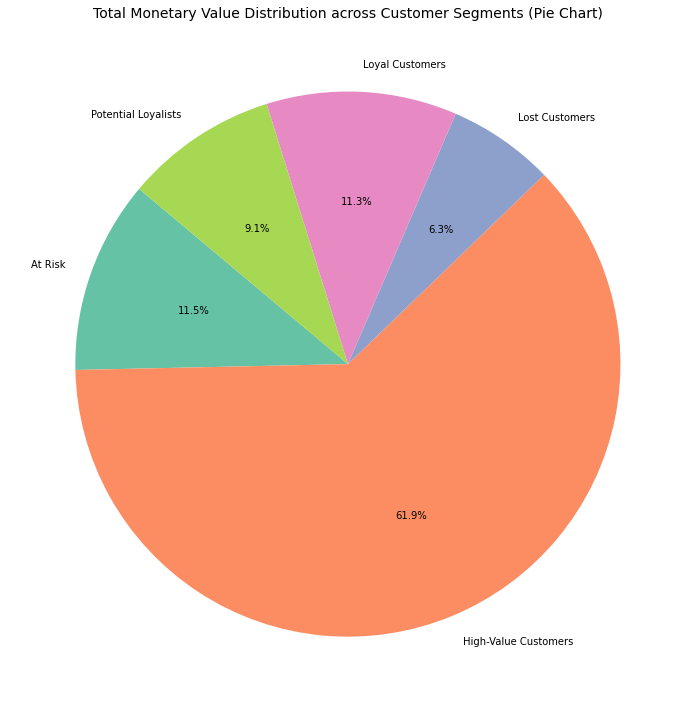

In [0]:
#Pie chart showing the distribution of the cutomer segments based on monetary expenditure

monetary_per_segment = RFMdf.groupby('Segment')['Monetary'].sum()
plt.figure(figsize=(10, 10))
plt.pie(monetary_per_segment, labels=monetary_per_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Total Monetary Value Distribution across Customer Segments (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()

### Analysis of Customer Segments and Monetary Value Distribution

The pie chart displaying the distribution of customer segments shows that the customer base is unevenly split across the categories, with "Lost Customers" making up the largest segment at 39.1%, followed by "At Risk Customers" at 24%, and "High-Value Customers" at 16%. Notably, the "Loyal Customers" and "Potential Loyalistss" segments each account for just 11.3% and 9.1%, respectively.

The total monetary value distribution reveals a stronger concentration of spending from loyal customers. "High-Value Customers" contribute the largest share of monetary value at 61.9%, while "Loyal Customers" make up 11.3%, while "Potential Loyalists" at 9.1%. "At Risk" and "Lost Customers" contribute to the total monetary value, at 11.5% and 6.3%, respectively. This indicates that the more engaged customers are the highest spenders, which emphasizes the importance of retaining loyal customers.


## Additional


### Holiday Season Purchase Analysis and Recommendations

In this analysis, we focus on customer purchase behavior during the holiday season. We examine purchase frequency, identify best-selling products, and analyze how different customer segments engage with products. This insight will help us create targeted business strategies, particularly around offering customized coupons to maximize holiday sales.

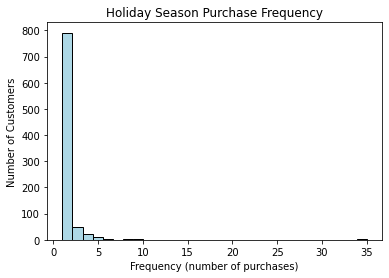

Top 10 Best-Selling Products During Holiday Season:
     StockCode  Quantity
1916     84077      5139
2209    85123A      3611
349      21212      3572
1513     22834      3367
1191     22492      2700
1306     22616      2656
1379     22693      2616
2069     84879      2267
938      22189      2254
747      21915      2162
Top Products by Segment during Holiday Season:
                 Segment StockCode  Quantity
0                At Risk     22328      1490
1                At Risk     16014      1001
2                At Risk     84212       480
3   High-Value Customers     22834      2533
4   High-Value Customers    85123A      2426
5   High-Value Customers     22693      2424
6         Lost Customers     84077      2976
7         Lost Customers     17096      1728
8         Lost Customers     21915      1485
9        Loyal Customers     84077       435
10       Loyal Customers    85123A       368
11       Loyal Customers     22834       328
12   Potential Loyalists     21212      1

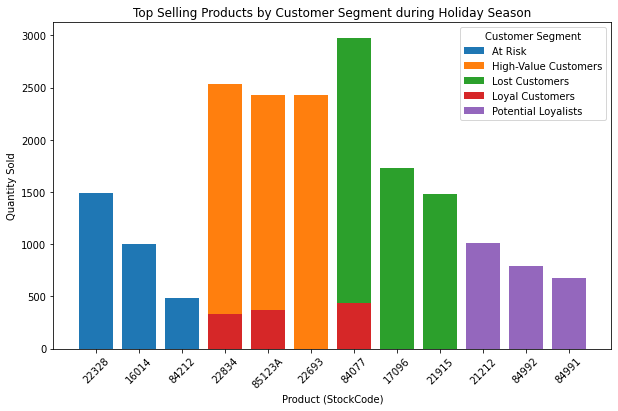

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Merge the two dataframes on CustomerID
df_merged = pd.merge(df, RFMdf, on='CustomerID', how='left')

# Filter for holiday season 
holiday_start = '2010-11-01'  # Start of holiday season 
holiday_end = '2010-12-31'    # End of holiday season 

# Filter the data for the holiday season
holiday_data = df_merged[(df_merged['InvoiceDate'] >= holiday_start) & (df_merged['InvoiceDate'] <= holiday_end)]

# Check frequency of purchases during the holiday season
holiday_frequency = holiday_data.groupby('CustomerID')['InvoiceNo'].nunique()

# Plotting histogram for frequency of purchases during holiday season
plt.hist(holiday_frequency, bins=30, color='lightblue', edgecolor='black')
plt.title('Holiday Season Purchase Frequency')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Number of Customers')
plt.show()

# Identify best-selling products during the holiday season
best_selling_products = holiday_data.groupby('StockCode')['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values('Quantity', ascending=False)

# Display the top 10 best-selling products
print("Top 10 Best-Selling Products During Holiday Season:")
print(best_selling_products.head(10))

# Analyze the types of products purchased by each segment
segment_product_purchase = holiday_data.groupby(['Segment', 'StockCode'])['Quantity'].sum().reset_index()

# To find the most frequent products purchased by each segment
top_products_by_segment = segment_product_purchase.groupby('Segment').apply(lambda x: x.nlargest(3, 'Quantity')).reset_index(drop=True)

# Display the top products by segment
print("Top Products by Segment during Holiday Season:")
print(top_products_by_segment)

# Visualize the top-selling products for each segment
fig, ax = plt.subplots(figsize=(10, 6))
for segment in top_products_by_segment['Segment'].unique():
    segment_data = top_products_by_segment[top_products_by_segment['Segment'] == segment]
    ax.bar(segment_data['StockCode'], segment_data['Quantity'], label=segment)

ax.set_xlabel('Product (StockCode)')
ax.set_ylabel('Quantity Sold')
ax.set_title('Top Selling Products by Customer Segment during Holiday Season')
ax.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.show()


1. **Purchase Frequency Analysis**  
   - **Observation**: The histogram shows most customers made fewer purchases, while a smaller group made multiple purchases.  
   - **Business Insight**: Offer special holiday promotions to encourage infrequent buyers to make more purchases.

2. **Top 10 Best-Selling Products**  
   - **Observation**: Products like `84077` and `85123A` were best-sellers.  
   - **Business Insight**: Feature these products in holiday campaigns and offer discounts to further boost sales.

3. **Top Products by Customer Segment**  
   - **Observation**: Different customer segments prefer specific products, such as `17096` for At Risk customers and `22616` for Super Loyal customers.  
   - **Business Insight**: Create personalized coupons for each segment, such as special discounts for At Risk customers and exclusive deals for Super Loyal customers.

4. **Coupon Strategy Recommendations**  
   - **Targeted Offers**: Design personalized offers based on segment preferences, such as discounts for At Risk and Super Loyal customers.  
   - **Seasonal Promotions**: Implement limited-time offers to increase holiday shopping urgency and maximize sales.

By aligning marketing efforts with customer behavior, businesses can enhance their holiday sales and build lasting customer loyalty.


### Itemset Analysis Results

#### Frequent Itemsets:
The Apriori algorithm identifies frequent itemsets where items are bought together with a minimum support of 0.01.

#### Association Rules:
The generated association rules use **lift** as the key metric, indicating how much more likely items are to be bought together compared to independently.


In [0]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Group the data by InvoiceNo to create transactions of items bought together
transactions = df.groupby('InvoiceNo')['StockCode'].apply(list)

# TransactionEncoder to one-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head())

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift",num_itemsets =2, min_threshold=1.0)

# Display the association rules
print("Association Rules:")
print(rules)

# Sort rules by confidence for more meaningful insights
rules_sorted = rules.sort_values(by='confidence', ascending=False)
print("Top Rules by Confidence:")
print(rules_sorted.head(10))


Frequent Itemsets:
    support   itemsets
0  0.017483    (15036)
1  0.015703  (15056BL)
2  0.020397   (15056N)
3  0.013382   (16161P)
4  0.011116    (17003)
Association Rules:
         antecedents            consequents  antecedent support  \
0            (22386)                (20712)            0.047000   
1            (20712)                (22386)            0.026549   
2            (20712)               (85099B)            0.026549   
3           (85099B)                (20712)            0.086337   
4            (20713)               (85099B)            0.022178   
...              ...                    ...                 ...   
1115  (22699, 22423)         (22698, 22697)            0.022664   
1116         (22698)  (22697, 22699, 22423)            0.030002   
1117         (22697)  (22698, 22699, 22423)            0.037287   
1118         (22699)  (22698, 22697, 22423)            0.042251   
1119         (22423)  (22698, 22697, 22699)            0.091895   

      consequent su

In [0]:
# Sort the association rules by lift in descending order
top_10_rules_by_lift = rules_sorted[['antecedents', 'consequents', 'support', 'lift']].head(10)

# Display the top 10 item pairs along with their support and lift values
print("Top 10 Item Pairs Bought Together (Based on Lift):")
print(top_10_rules_by_lift)


Top 10 Item Pairs Bought Together (Based on Lift):
                antecedents consequents   support       lift
1056         (22745, 22746)     (22748)  0.010037  48.596532
1108  (22698, 22699, 22423)     (22697)  0.012897  24.187795
531                 (23172)     (23171)  0.010900  61.895899
1039         (22698, 22699)     (22697)  0.021045  23.989564
1107  (22698, 22697, 22423)     (22699)  0.012897  20.873205
528                 (23172)     (23170)  0.010630  49.689732
1021         (22698, 22423)     (22697)  0.014623  23.520961
1058         (22746, 22748)     (22745)  0.010037  50.735237
1033         (22698, 22423)     (22699)  0.014300  20.297751
504                 (22746)     (22748)  0.011602  45.696624


#### Top 10 Item Pairs Based on Lift:
Here are the top 10 item pairs with the highest lift values, suggesting strong associations between the items:

| Antecedents            | Consequents | Support  | Lift       |
|------------------------|-------------|----------|------------|
| (22745, 22746)          | 22748       | 0.010037 | 48.60      |
| (22698, 22699, 22423)  | 22697       | 0.012897 | 24.19      |
| (23172)                 | 23171       | 0.010900 | 61.90      |
| (22698, 22699)         | 22697       | 0.021045 | 23.99      |
| (22698, 22697, 22423)  | 22699       | 0.012897 | 20.87      |
| (23172)                 | 23170       | 0.010630 | 49.69      |
| (22698, 22423)         | 22697       | 0.014623 | 23.52      |
| (22746, 22748)         | 22745       | 0.010037 | 50.74      |
| (22698, 22423)         | 22699       | 0.014300 | 20.30      |
| (22746)                 | 22748       | 0.011602 | 45.70      |

These item pairs have the highest lift values, indicating that they are more likely to be purchased together than independently, providing valuable insights for cross-selling and product bundling strategies.